In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../Data/insurance2.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
X = df.drop("insuranceclaim", axis=1)
y = df["insuranceclaim"]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)


In [6]:
from sklearn.ensemble import RandomForestClassifier
claim_approval = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)


In [7]:
claim_approval.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred = claim_approval.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9164179104477612

Confusion Matrix:
 [[121  11]
 [ 17 186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       132
           1       0.94      0.92      0.93       203

    accuracy                           0.92       335
   macro avg       0.91      0.92      0.91       335
weighted avg       0.92      0.92      0.92       335



In [10]:
importance = pd.Series(
    claim_approval.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


bmi         0.346573
children    0.258582
charges     0.175917
age         0.097290
smoker      0.087414
region      0.023745
sex         0.010478
dtype: float64

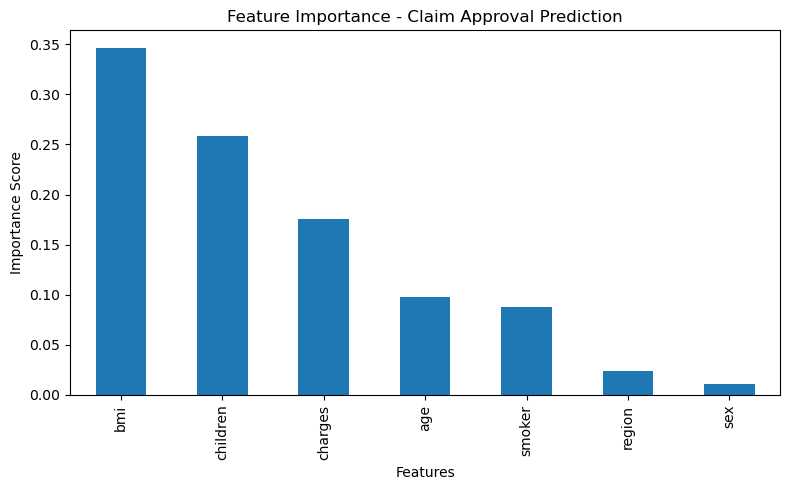

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
importance.plot(kind='bar')
plt.title("Feature Importance - Claim Approval Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


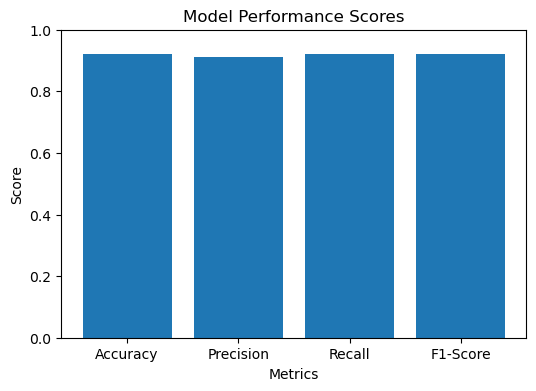

In [12]:
scores = {
    "Accuracy": 0.92,
    "Precision": 0.91,
    "Recall": 0.92,
    "F1-Score": 0.92
}
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(scores.keys(), scores.values())
plt.ylim(0,1)
plt.title("Model Performance Scores")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.show()


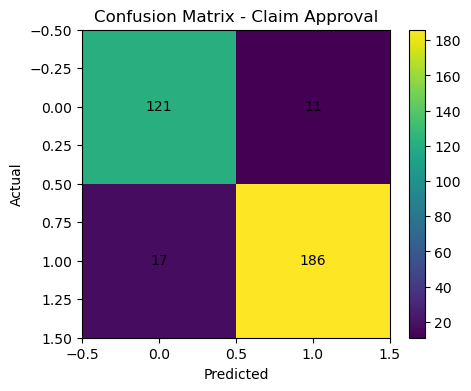

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.colorbar()
plt.title("Confusion Matrix - Claim Approval")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [14]:
import joblib

joblib.dump(
    claim_approval,
    r"D:\Life_Insurance_Claim_Prediction\models\approval_model.pkl"
)
print("Approval model saved successfully")


Approval model saved successfully


In [15]:
joblib.load(
    r"D:\Life_Insurance_Claim_Prediction\models\approval_model.pkl"
)
print("Approval model load OK")


Approval model load OK


In [16]:
y.value_counts()


insuranceclaim
1    783
0    555
Name: count, dtype: int64